# Problem statement: Create a classification model for the Fashion MNIST

The objective is to create a classification model for the Fashion MNIST dataset using a Multi-Layer Perceptron (MLP).

We'll follow these steps:

### 1. Data Preprocessing
- **Loading the Data**: Fashion MNIST is a dataset of Zalando's article images, with 60,000 training samples and 10,000 test samples. Each sample is a 28x28 grayscale image, associated with a label from 10 classes.
- **Normalization**: We normalize the pixel values (ranging from 0 to 255) to a scale of 0 to 1. This improves the training efficiency.
- **Reshaping for MLP**: Since we are using an MLP, we need to reshape the 28x28 images into a flat array of 784 pixels.

### 2. Building the MLP Model
- **Dense Layers**: These are fully connected neural layers. The first layer needs to know the input shape (784 in this case).
- **Activation Functions**: 'ReLU' is used for non-linear transformations. The final layer uses 'softmax' for a probability distribution over 10 classes.

### 3. Compiling the Model
- **Optimizer**: 'Adam' is a popular choice for its adaptive learning rate properties.
- **Loss Function**: 'sparse_categorical_crossentropy' is suitable for multi-class classification problems.
- **Metrics**: We'll use 'accuracy' to understand the performance.

### 4. Training the Model
- We train the model using the `fit` method, specifying epochs and batch size.

### 5. Evaluating the Model
- The `evaluate` method is used to test the model on the test set.

The notebook contains one exercise in total:

* [Exercise 1](#ex_1)

In [4]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the images to [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape data for MLP input
train_images = train_images.reshape((-1, 28*28))
test_images = test_images.reshape((-1, 28*28))

# Build the MLP model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=64)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7638 - loss: 0.6848
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8610 - loss: 0.3948
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8696 - loss: 0.3604
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8800 - loss: 0.3283
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8871 - loss: 0.3093
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8944 - loss: 0.2889
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8987 - loss: 0.2785
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9047 - loss: 0.2639
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9042 - loss: 0.2568
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9099 - loss: 0.2446
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8848 - loss: 0.3233
Test accuracy: 0.8833000063896179


To improve the model's accuracy on the Fashion MNIST dataset, we can experiment with various techniques. Here are some strategies:

1. **Increase Model Complexity**: Add more layers or increase the number of neurons in each layer to capture more complex patterns in the data.

2. **Regularization**: Implement dropout or L1/L2 regularization to reduce overfitting.

3. **Advanced Optimizers**: Experiment with different optimizers like SGD or RMSprop.

4. **Learning Rate Scheduling**: Adjust the learning rate during training.

5. **Data Augmentation**: Although not typical for MLPs, slight modifications to the input data can make the model more robust.

6. **Early Stopping**: Stop training when the validation accuracy stops improving.

7. **Hyperparameter Tuning**: Experiment with different activation functions, batch sizes, and epochs.

8. **Batch Normalization**: This can help in faster convergence and overall performance improvement.

Let's modify the previous code to incorporate some of these strategies.

In [5]:
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Modified MLP model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(BatchNormalization())  # Batch normalization layer
model.add(Dropout(0.5))         # Dropout layer
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())  # Another batch normalization layer
model.add(Dropout(0.5))         # Another dropout layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model with validation split
model.fit(train_images, train_labels, epochs=50, batch_size=64,
          validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.6780 - loss: 0.9796 - val_accuracy: 0.8345 - val_loss: 0.4515
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8061 - loss: 0.5467 - val_accuracy: 0.8429 - val_loss: 0.4278
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8246 - loss: 0.4967 - val_accuracy: 0.8592 - val_loss: 0.3862
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8337 - loss: 0.4677 - val_accuracy: 0.8618 - val_loss: 0.3796
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8400 - loss: 0.4523 - val_accuracy: 0.8568 - val_loss: 0.3880
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8456 - loss: 0.4390 - val_accuracy: 0.8490 - val_loss: 0.4058
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8455 - loss: 0.4308 - val_accuracy: 0.8652 - val_loss: 0.3675
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8496 - loss: 0.4255 - val_accura

The test accuracy decreased slightly in this case. This outcome highlights an important aspect of machine learning: improvements in model architecture don't always lead to better performance, and sometimes simpler models can outperform more complex ones, especially on smaller datasets like Fashion MNIST.

Here are a few additional steps you can take to try and improve the model's performance:

1. **Adjust the Dropout Rate**: The dropout rate of 0.5 might be too high, causing the model to lose relevant information. Try reducing it to 0.3 or 0.2.

2. **Fine-Tune the Model Complexity**: The addition of more neurons might have made the model too complex. Try reducing the number of neurons in the dense layers.

3. **Experiment with Different Optimizers**: While Adam is a strong general-purpose optimizer, sometimes others like SGD (with a momentum) or RMSprop might yield better results for specific problems.

4. **Modify the Learning Rate**: Adjusting the learning rate of the Adam optimizer could also lead to better results. A lower learning rate with more epochs can sometimes achieve better generalization.

5. **Experiment with Batch Sizes**: Smaller or larger batch sizes can impact the model's ability to generalize and learn effectively.

6. **Cross-Validation**: Instead of a single validation split, use k-fold cross-validation for a more robust estimate of model performance.

Let's adjust the code with some of these suggestions.

In [6]:
# Adjust the model architecture and training parameters
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dropout(0.3))         # Reduced dropout rate
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))         # Reduced dropout rate
model.add(Dense(10, activation='softmax'))

# Compile the model with a modified optimizer
model.compile(optimizer='adam',  # You can experiment with learning rate here
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with a different batch size
model.fit(train_images, train_labels, epochs=50, batch_size=32,  # Smaller batch size
          validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6807 - loss: 0.9023 - val_accuracy: 0.8335 - val_loss: 0.4530
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8256 - loss: 0.4890 - val_accuracy: 0.8522 - val_loss: 0.4052
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8441 - loss: 0.4334 - val_accuracy: 0.8629 - val_loss: 0.3877
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8497 - loss: 0.4169 - val_accuracy: 0.8706 - val_loss: 0.3566
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8582 - loss: 0.3877 - val_accuracy: 0.8667 - val_loss: 0.3581
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8603 - loss: 0.3810 - val_accuracy: 0.8738 - val_loss: 0.3431
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8664 - loss: 0.3645 - val_accuracy: 0.8758 - val_loss: 0.3468
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8692 - loss: 0.36

The test accuracy has improved to 0.8778, which is a positive outcome. This result indicates that the adjustments made to the model architecture and training parameters were beneficial.

However, achieving higher accuracy on a dataset like Fashion MNIST can be challenging, especially with a simple model like a Multi-Layer Perceptron (MLP). To potentially achieve even better results, consider the following additional steps:

1. **Feature Engineering**: Although this is more limited with image data and MLPs, ensuring the input data is as informative and clean as possible is crucial.

2. **Ensemble Methods**: Combine predictions from several models to improve accuracy. For example, train multiple MLPs with different architectures and average their predictions.

3. **Convolutional Neural Networks (CNNs)**: For image data, CNNs are generally more effective than MLPs. They can capture spatial hierarchies in the data better due to their convolutional layers.

4. **Hyperparameter Optimization**: Use techniques like grid search or random search to systematically explore different hyperparameter combinations.

5. **Advanced Regularization Techniques**: Experiment with other regularization methods like L1 regularization or different dropout configurations.

Let's adjust the code with some of these suggestions.

In [7]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Reshape data for CNN input
train_images_cnn = train_images.reshape((-1, 28, 28, 1))
test_images_cnn = test_images.reshape((-1, 28, 28, 1))

# Build a simple CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
cnn_model.fit(train_images_cnn, train_labels, epochs=10, batch_size=64,
              validation_split=0.2)

# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(test_images_cnn, test_labels)

print('CNN Test accuracy:', test_acc)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.7186 - loss: 0.7687 - val_accuracy: 0.8601 - val_loss: 0.3830
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 57ms/step - accuracy: 0.8726 - loss: 0.3579 - val_accuracy: 0.8518 - val_loss: 0.3897
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 53ms/step - accuracy: 0.8829 - loss: 0.3147 - val_accuracy: 0.8930 - val_loss: 0.2961
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.9010 - loss: 0.2708 - val_accuracy: 0.8732 - val_loss: 0.3393
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.9059 - loss: 0.2537 - val_accuracy: 0.9038 - val_loss: 0.2741
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 56ms/step - accuracy: 0.9162 - loss: 0.2292 - val_accuracy: 0.9068 - val_loss: 0.2593
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 53ms/step - accuracy: 0.9233 - loss: 0.2052 - val_accuracy: 0.9088 - val_loss: 0.2545
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 56ms/step - accuracy: 0.9312 - loss: 0.1879 - 

<a name="ex_1"></a>
## Exercise 1: Improve the accuracy of the MLP model
1. Try different architectures and hyperparameters.
2. Use regularization techniques like L1 or L2 regularization.
3. Use dropout to reduce overfitting.

Referans link: https://www.analyticsvidhya.com/blog/2018/04/fundamentals-deep-learning-regularization-techniques/

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
%load_ext tensorboard

# Helper libraries
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime

print(tf.__version__)


2.18.0


In [9]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Reshape data for CNN input
train_images_cnn = train_images.reshape((-1, 28, 28, 1))
test_images_cnn = test_images.reshape((-1, 28, 28, 1))

# define input shape
INPUT_SHAPE = (28, 28, 1)

# define sequential model
model = tf.keras.models.Sequential()

# define conv-pool layers - set 1
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='valid', input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# define conv-pool layers - set 2
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='valid'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# add flatten layer
model.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))

# add output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

### Call back with Tensor board  and Early Stopping
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
earlystopping_callback = EarlyStopping(monitor='val_loss',
                                       min_delta=0,
                                       patience=3,
                                       verbose=0, mode='auto',
                                       baseline=None,
                                       restore_best_weights=True
                                       )

# view model layers
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │         205,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 278,218 (1.06 MB)

 Trainable params: 278,218 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Train the model
history = model.fit(train_images_cnn,
              train_labels,
              epochs=50,
              batch_size=32,
              validation_split=0.2,
              callbacks=[tensorboard_callback,earlystopping_callback])

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images_cnn, test_labels)

print('CNN Test accuracy:', test_acc)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.7078 - loss: 0.7871 - val_accuracy: 0.8504 - val_loss: 0.4105
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.8594 - loss: 0.3877 - val_accuracy: 0.8807 - val_loss: 0.3230
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.8791 - loss: 0.3299 - val_accuracy: 0.8849 - val_loss: 0.3030
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.8929 - loss: 0.2870 - val_accuracy: 0.8912 - val_loss: 0.2952
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9029 - loss: 0.2614 - val_accuracy: 0.8985 - val_loss: 0.2812
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.9097 - loss: 0.2415 - val_accuracy: 0.8982 - val_loss: 0.2805
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9141 - loss: 0.2300 - val_accuracy: 0.8967 - val_loss: 0.2811
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.9216 -

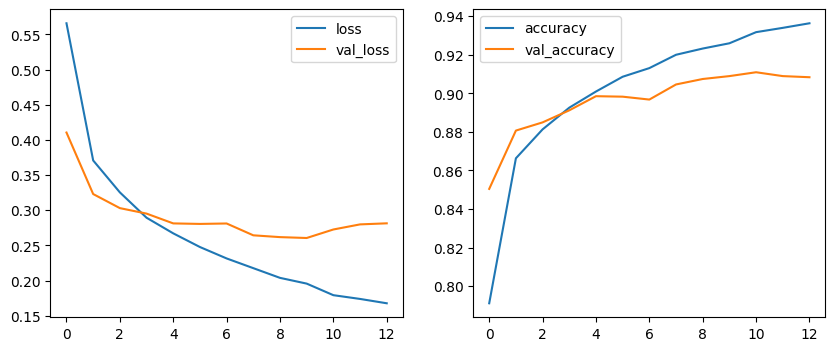

In [11]:
import pandas as pd

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1]);

In [12]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print('\nTrain_images.shape: {}, of {}'.format(train_images.shape, train_images.dtype))
print('Test_images.shape: {}, of {}'.format(test_images.shape, test_images.dtype))


Train_images.shape: (60000, 784), of float64
Test_images.shape: (10000, 784), of float64


In [13]:

from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

predictions = model.predict(test_images_cnn)

prediction_labels = np.argmax(predictions, axis=1)

print(classification_report(test_labels, prediction_labels, target_names=class_names))
pd.DataFrame(confusion_matrix(test_labels, prediction_labels), index=class_names, columns=class_names)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.87      0.83      0.85      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.86      0.84      0.85      1000
       Dress       0.91      0.91      0.91      1000
        Coat       0.85      0.85      0.85      1000
      Sandal       0.98      0.99      0.98      1000
       Shirt       0.70      0.74      0.72      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,834,2,14,15,6,0,122,0,7,0
Trouser,0,984,0,8,2,0,4,0,2,0
Pullover,16,1,841,11,52,0,78,0,1,0
Dress,13,16,8,910,22,0,28,0,2,1
Coat,1,0,40,26,848,0,83,0,2,0
Sandal,1,0,0,0,0,989,0,6,0,4
Shirt,95,2,67,23,62,0,740,0,11,0
Sneaker,0,0,0,0,0,14,0,962,1,23
Bag,2,0,3,3,5,3,7,2,975,0
Ankle boot,0,0,1,0,0,8,0,31,0,960


In [14]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras import regularizers

# Reshape data for CNN input
train_images_cnn = train_images.reshape((-1, 28, 28, 1))
test_images_cnn = test_images.reshape((-1, 28, 28, 1))

# define input shape
INPUT_SHAPE = (28, 28, 1)

# define sequential model
model = tf.keras.models.Sequential()

# define conv-pool layers - set 1
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same', input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# define conv-pool layers - set 2
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# add flatten layer
model.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# add output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

### Call back with Tensor board  and Early Stopping
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
earlystopping_callback = EarlyStopping(monitor='val_loss',
                                       min_delta=0,
                                       patience=3,
                                       verbose=0, mode='auto',
                                       baseline=None,
                                       restore_best_weights=True
                                       )

# view model layers
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 256)                 │         401,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 425,322 (1.62 MB)

 Trainable params: 425,322 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Train the model
history = model.fit(train_images_cnn,
              train_labels,
              epochs=50,
              batch_size=32,
              validation_split=0.2,
              callbacks=[tensorboard_callback,earlystopping_callback])

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images_cnn, test_labels)

print('CNN Test accuracy:', test_acc)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 33ms/step - accuracy: 0.7061 - loss: 1.7751 - val_accuracy: 0.8303 - val_loss: 0.7248
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.8294 - loss: 0.7004 - val_accuracy: 0.8493 - val_loss: 0.6049
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 28ms/step - accuracy: 0.8515 - loss: 0.5849 - val_accuracy: 0.8645 - val_loss: 0.5223
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.8637 - loss: 0.5229 - val_accuracy: 0.8652 - val_loss: 0.5041
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.8706 - loss: 0.4855 - val_accuracy: 0.8695 - val_loss: 0.4740
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.8740 - loss: 0.4654 - val_accuracy: 0.8752 - val_loss: 0.4526
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.8794 - loss: 0.4438 - val_accuracy: 0.8748 - val_loss: 0.4530
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.8794 -

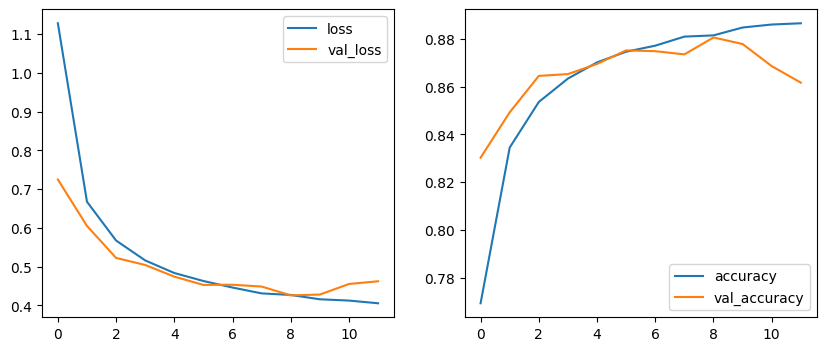

In [17]:

import pandas as pd

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1]);